In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Documents\dataset\kaggle dataset\Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df['country'].nunique()

167

In [8]:
df1=df

In [9]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Exploratory Data Analytics

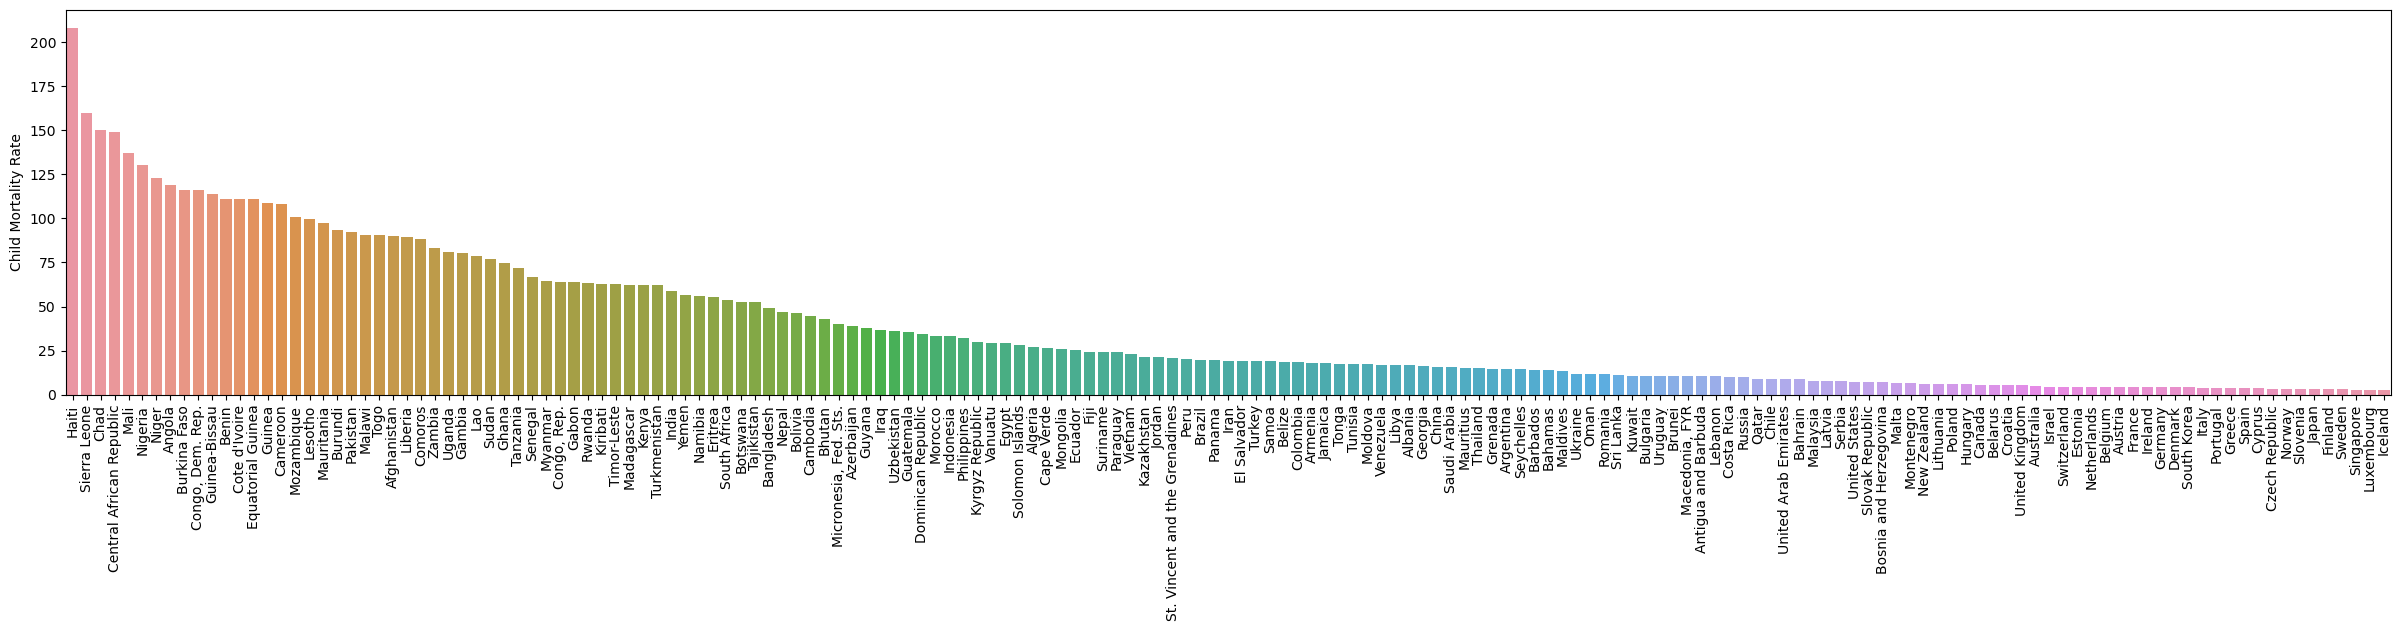

In [10]:
plt.figure(figsize = (30,5))
child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

We are able to see how Child Mortality Rate is distributed across the all countries. Focus on the objective of the task

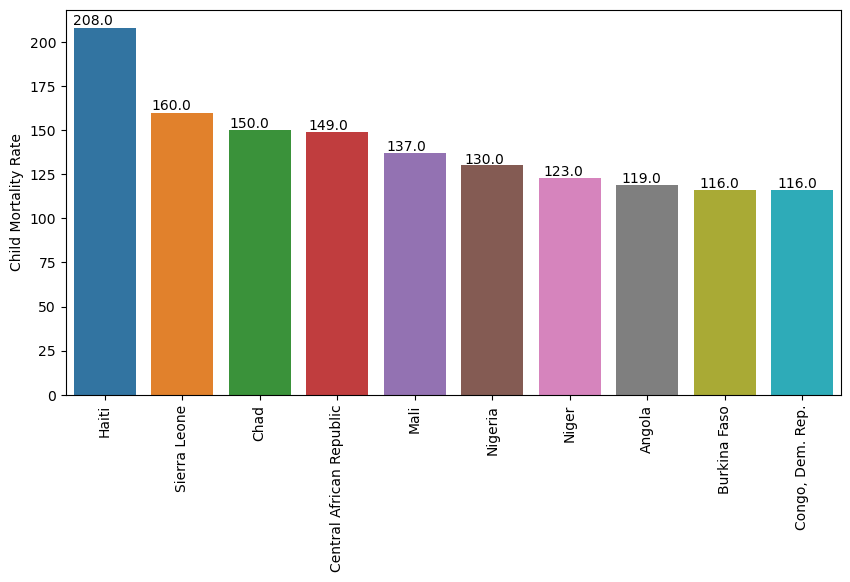

In [11]:
plt.figure(figsize = (10,5))
child_mort_top10 = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Child Mortality Rate are present in Africa having poor healthcare facilities.

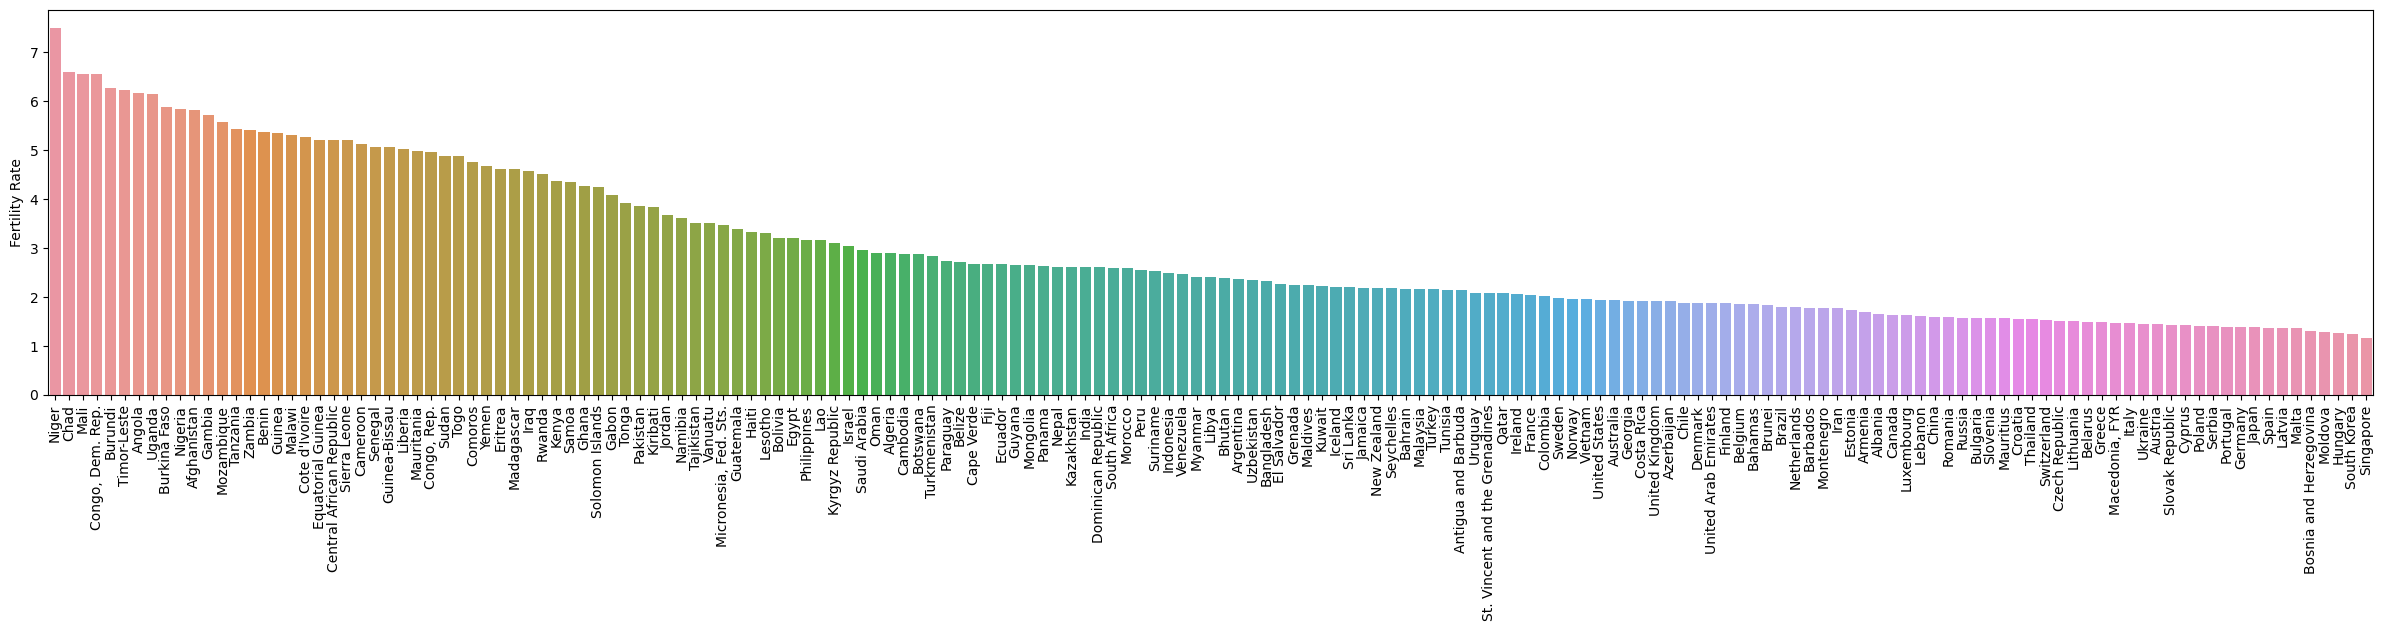

In [12]:
plt.figure(figsize = (30,5))
total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

We are able to see how Fertility Rate is distributed across the all countries.

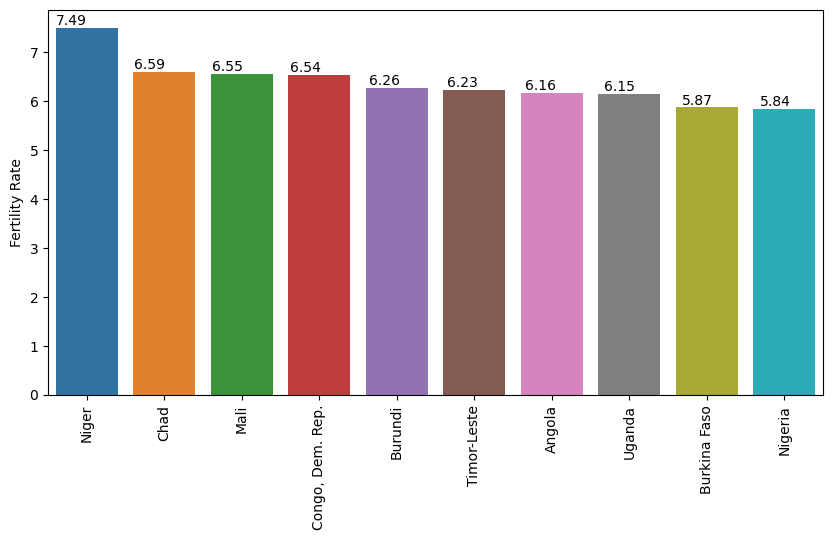

In [13]:
plt.figure(figsize = (10,5))
total_fer_top10 = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Fertility Rate are places where people are poorest in all.

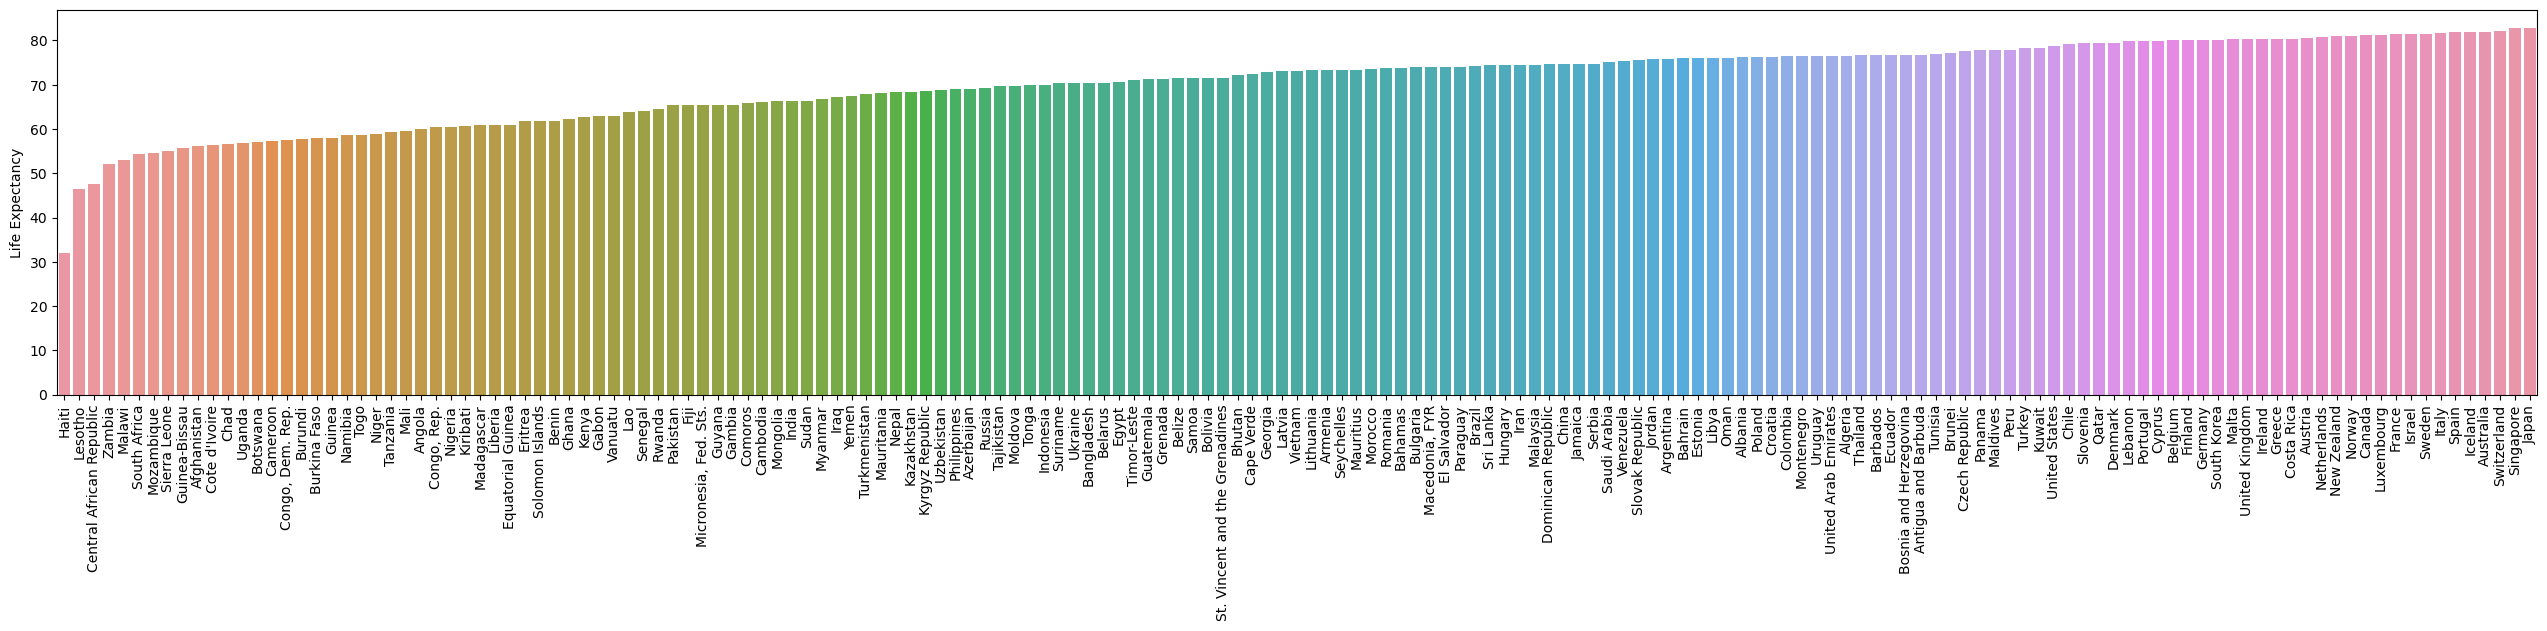

In [14]:
plt.figure(figsize = (32,5))
life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

We are able to see how Life Expectancy is distributed across the all countries. Focus on the objective of the task.

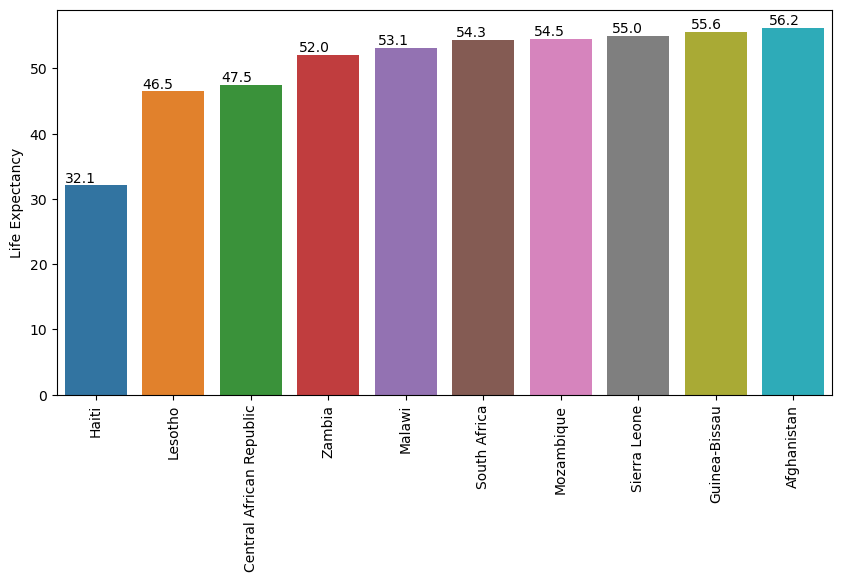

In [15]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Life Expectancy are places where healthcare system is not available or efficient.

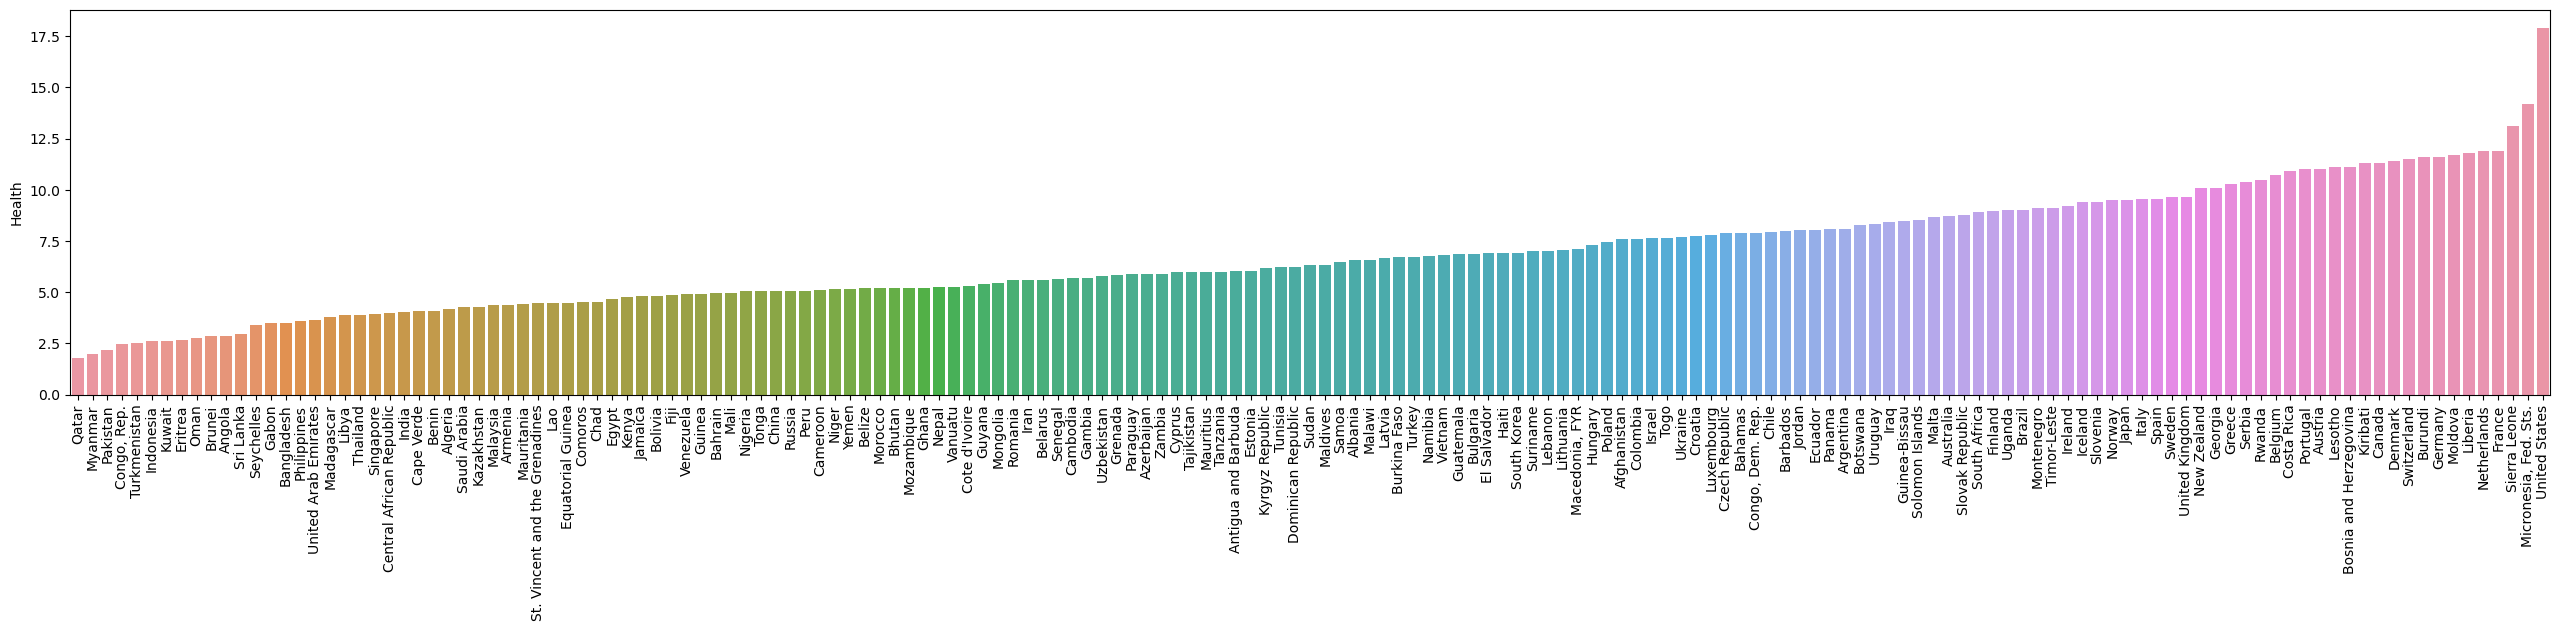

In [16]:
plt.figure(figsize = (32,5))
health = df[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

We are able to see how Total health spending is distributed across the all countries. Focus on the objective of the task.

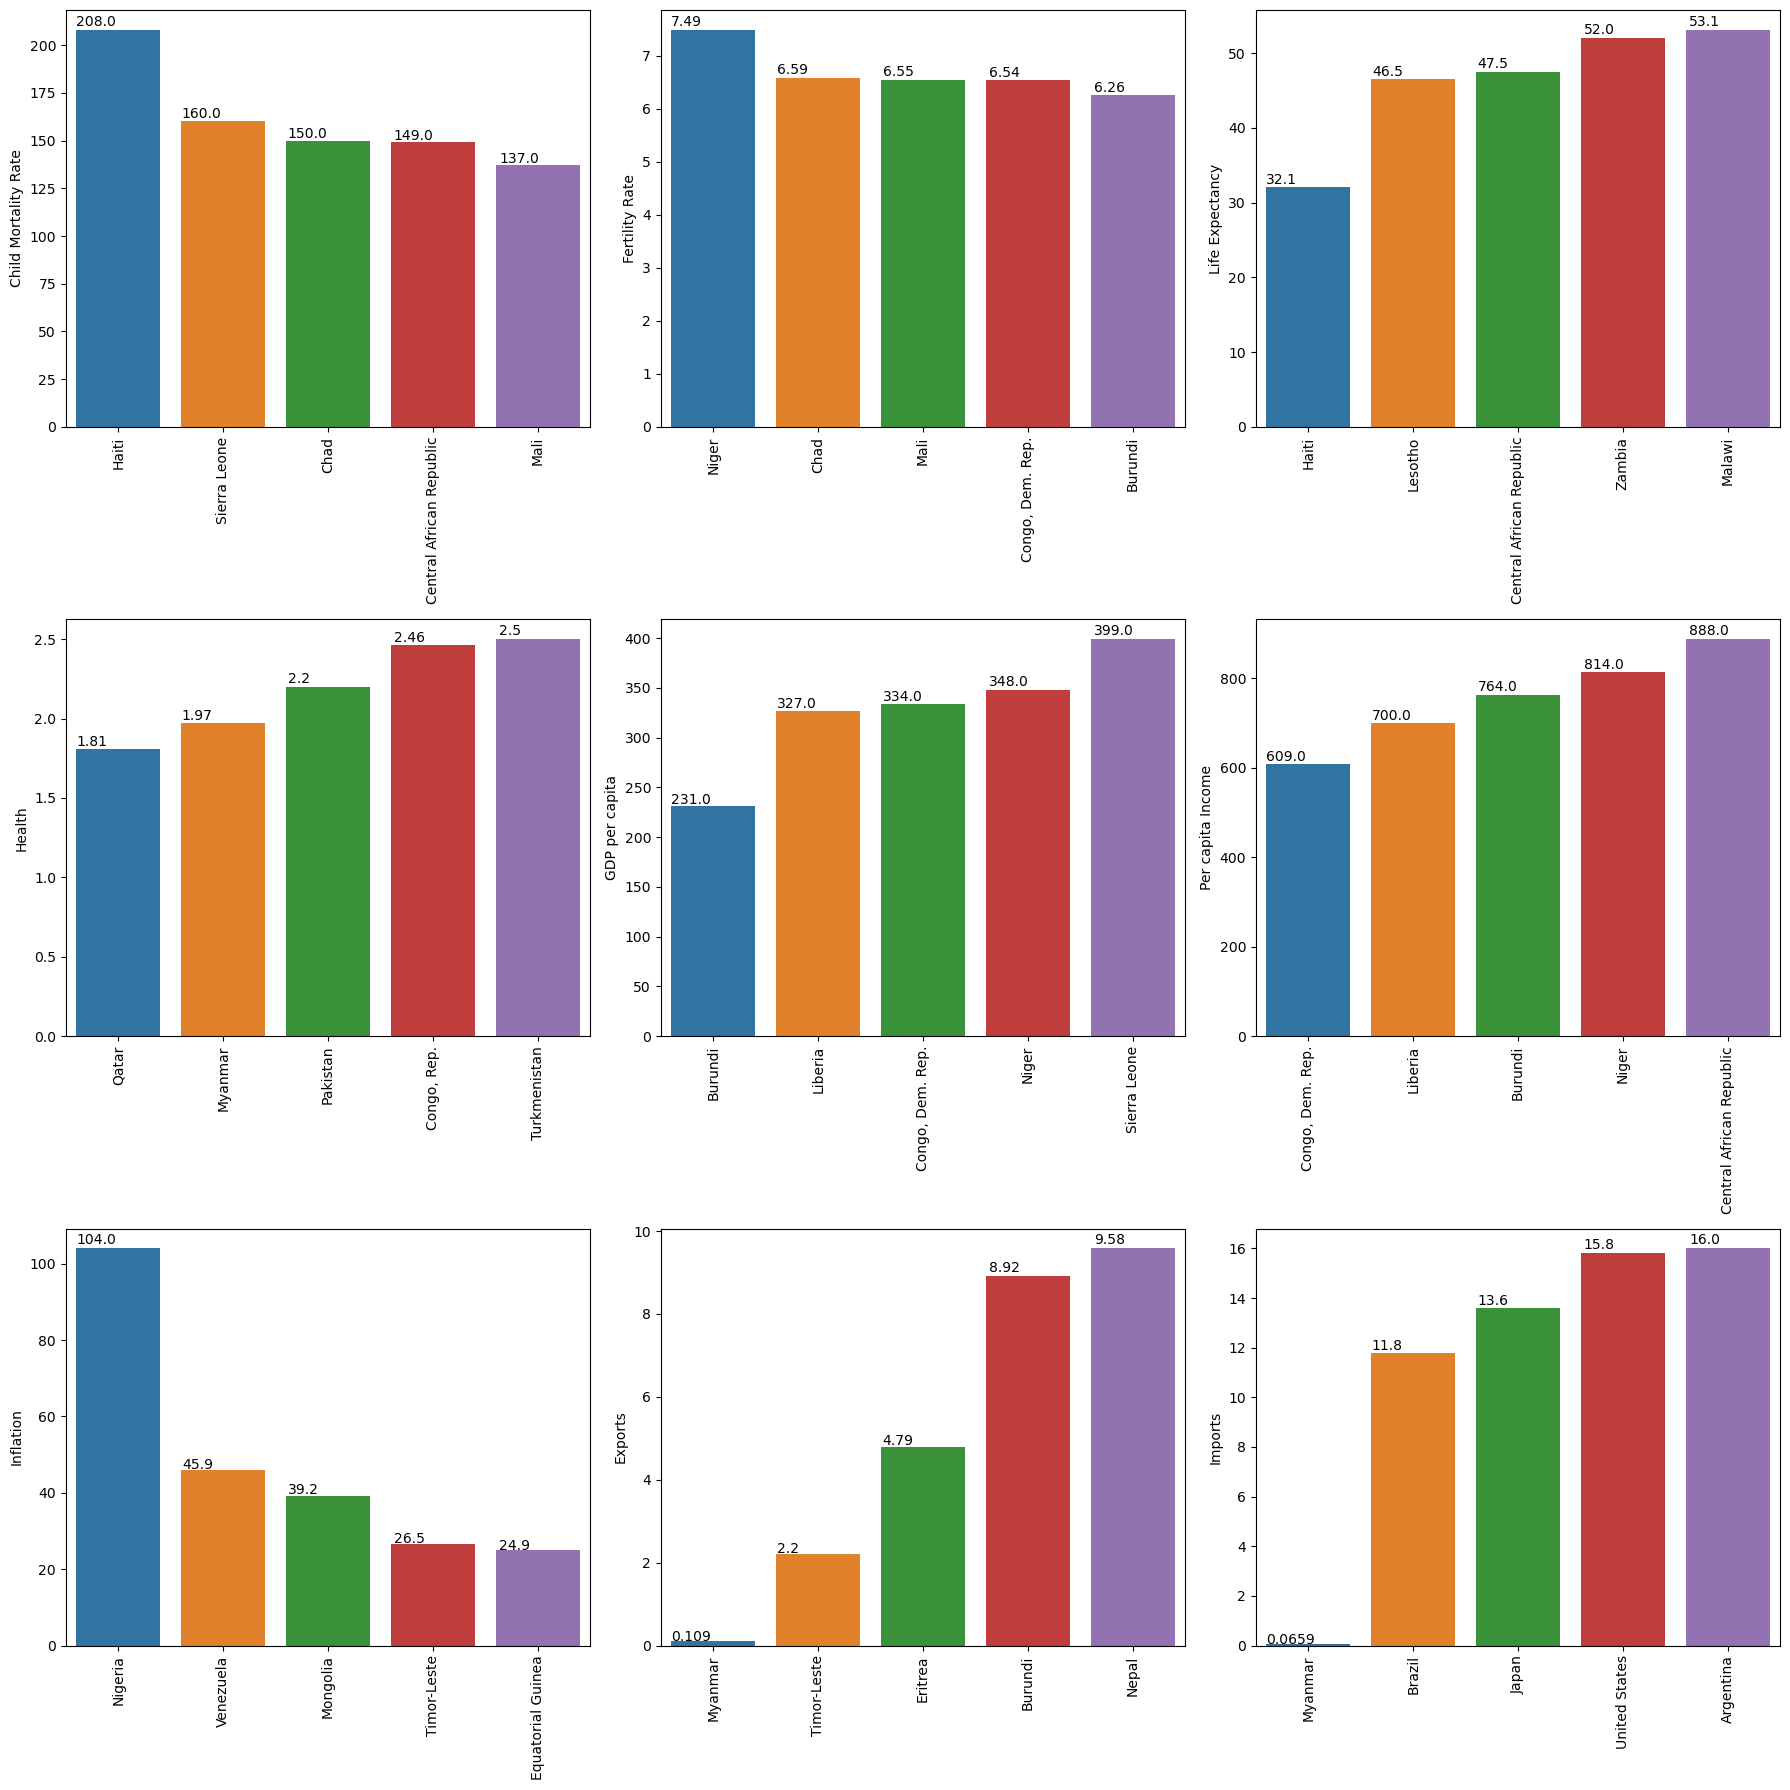

In [17]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')


top5_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')



bottom5_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')


bottom5_health = df[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')


bottom5_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')


bottom5_income = df[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


top5_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


bottom5_exports = df[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


bottom5_imports = df[['country', 'imports']].sort_values('imports', ascending=True).head()
ax = sns.barplot(x='country', y='imports', data=bottom5_imports, ax=axs[2, 2])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

ax.set(xlabel='', ylabel='Imports')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

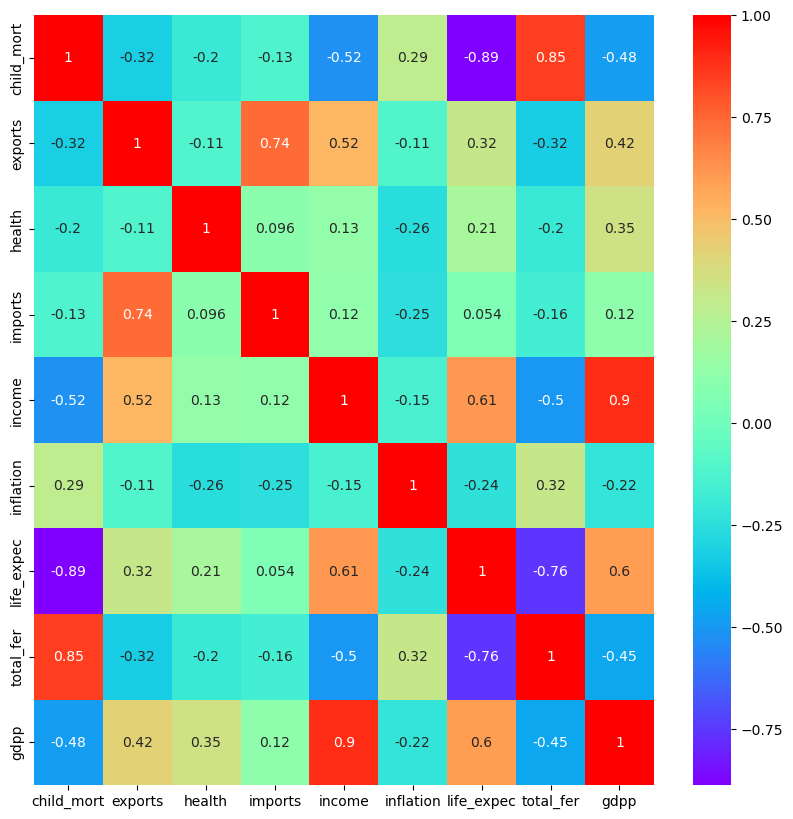

In [18]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- imports and exports are highly correlated with correlation of 0.99
- life_expentency and total_fertility are highly correlated with correlation of -0.76

C:\Users\akash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


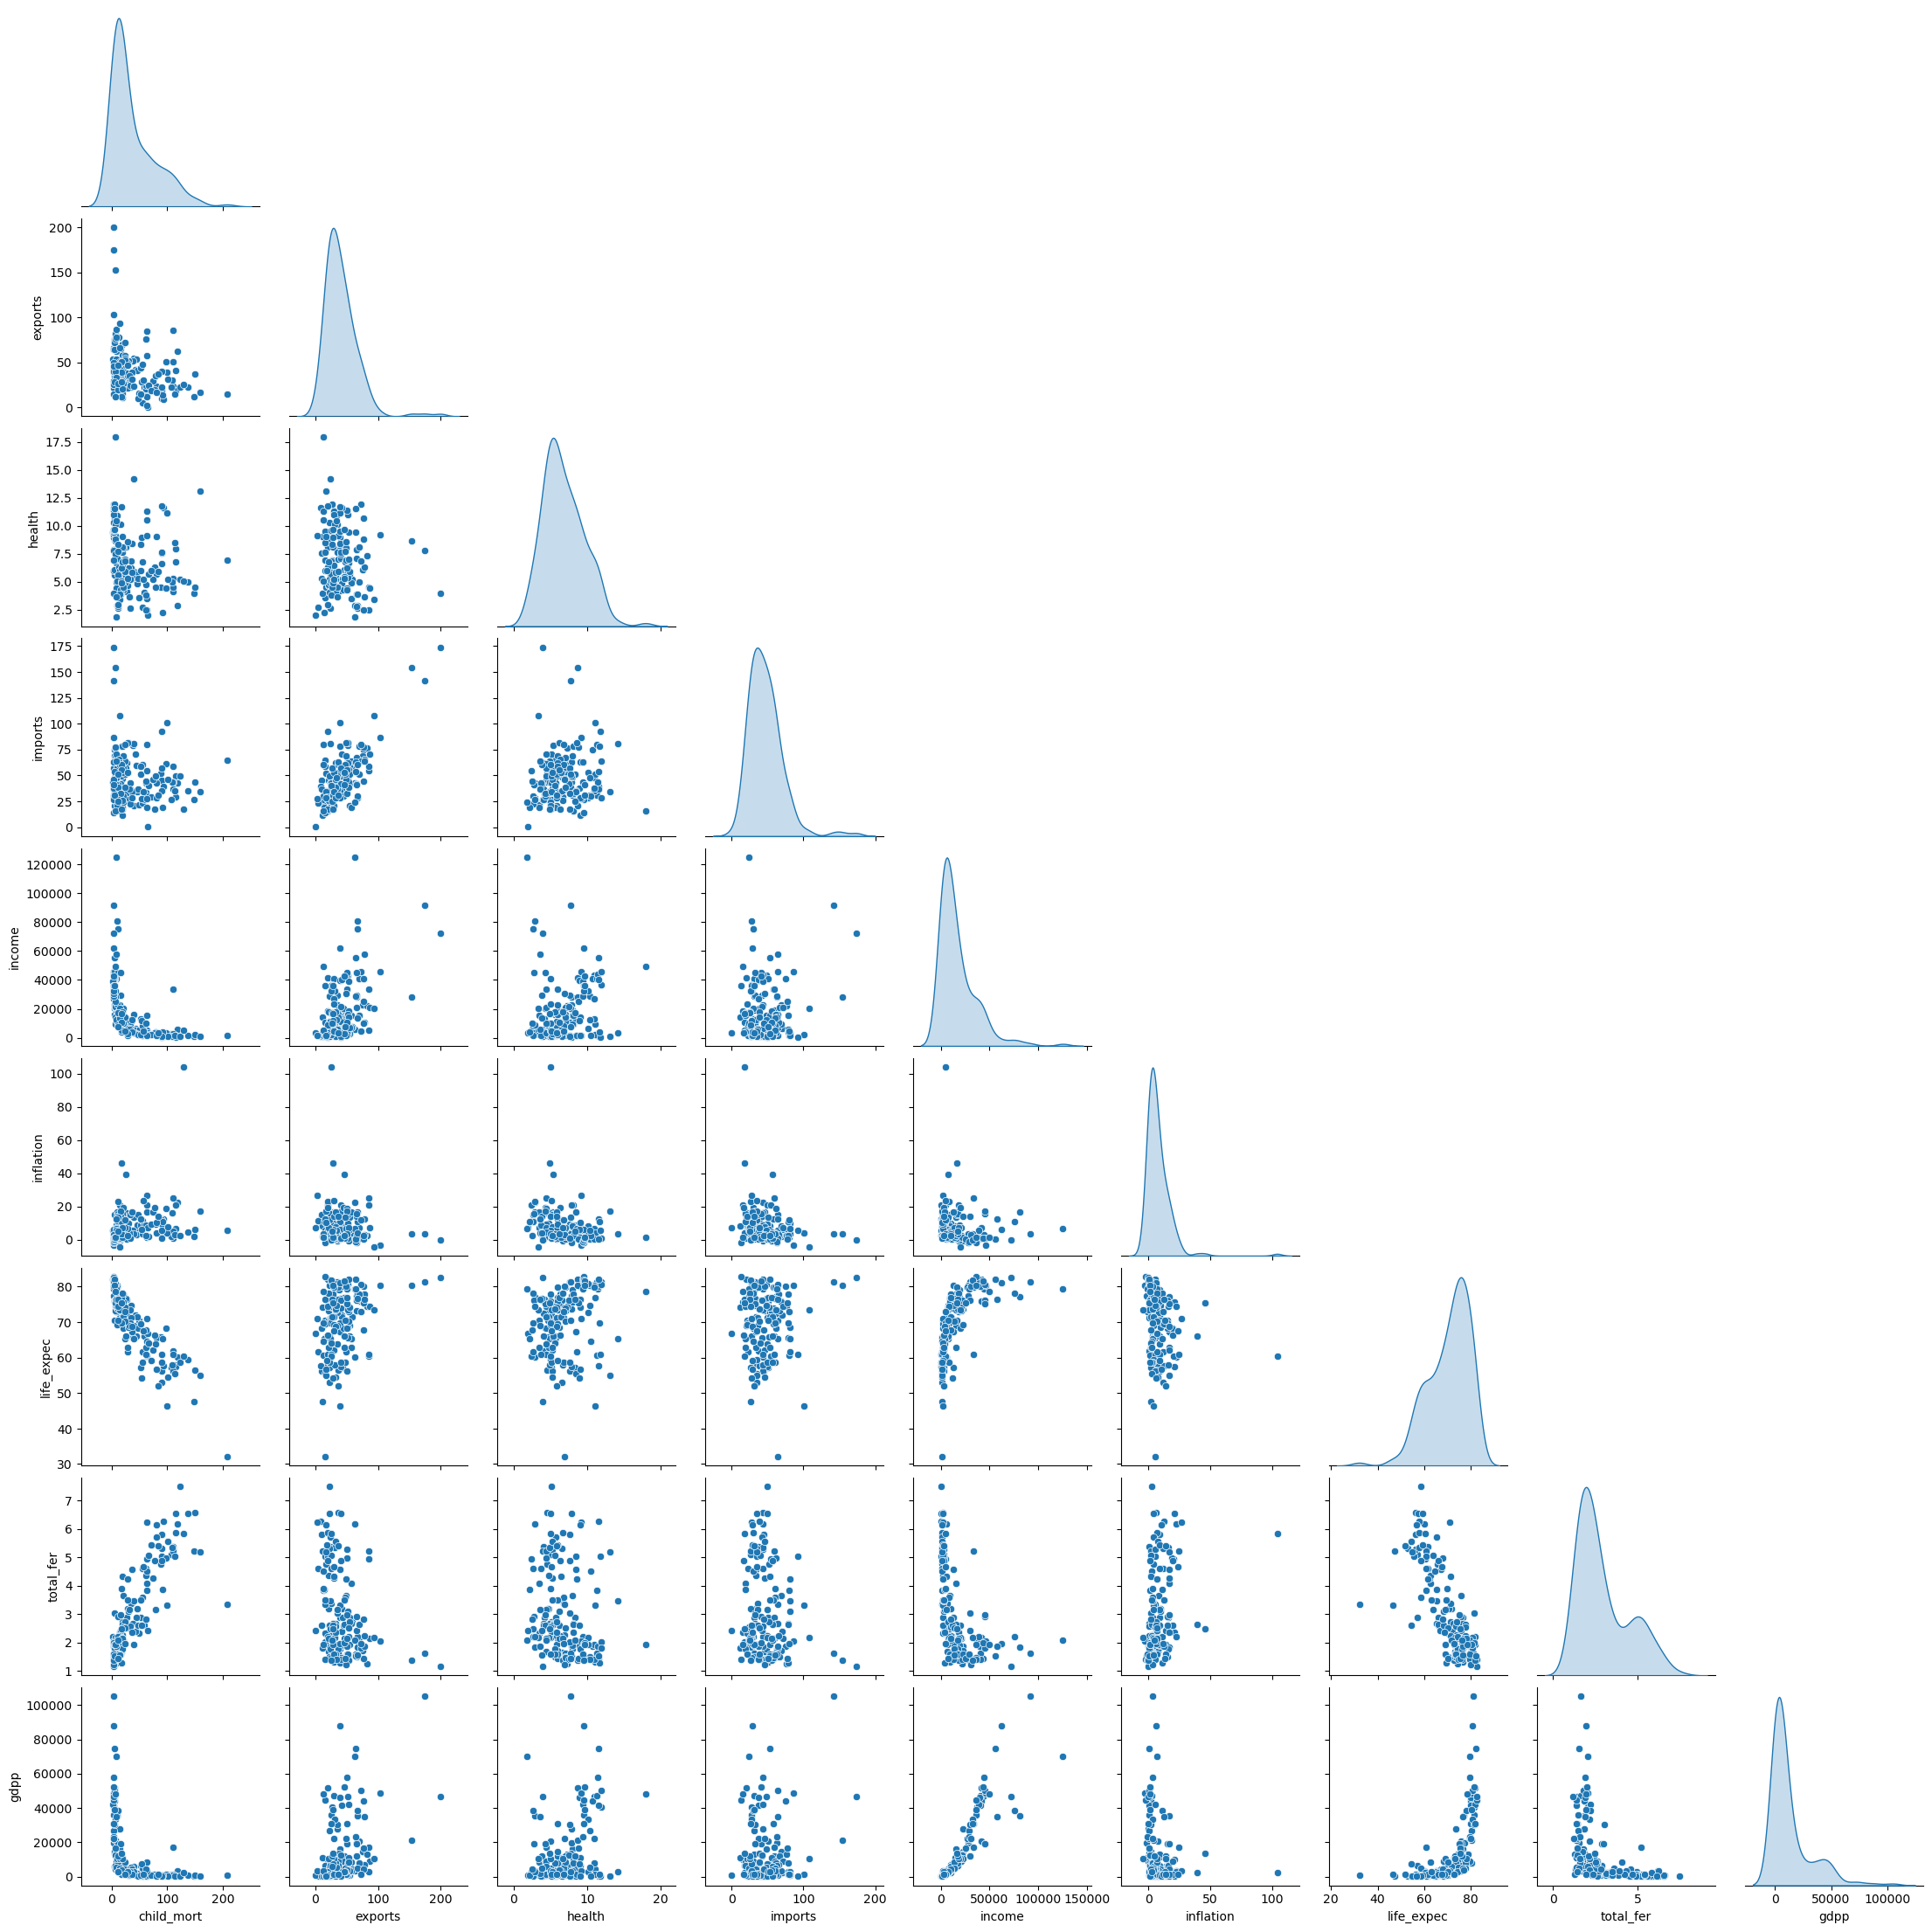

In [19]:
sns.pairplot(df,corner=True,diag_kind="kde")
plt.show()

### Data Preparation

In [20]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [21]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [22]:
# Dropping Country field as final dataframe will only contain data columns

df_drop = df.copy()
country = df_drop.pop('country')

In [23]:
df_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Rescaling the Features

In [24]:
# Standarisation technique for scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)

In [25]:
df_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## Model Building

### Agglomerative Hierarchical Clustering

#### Single Linkage:

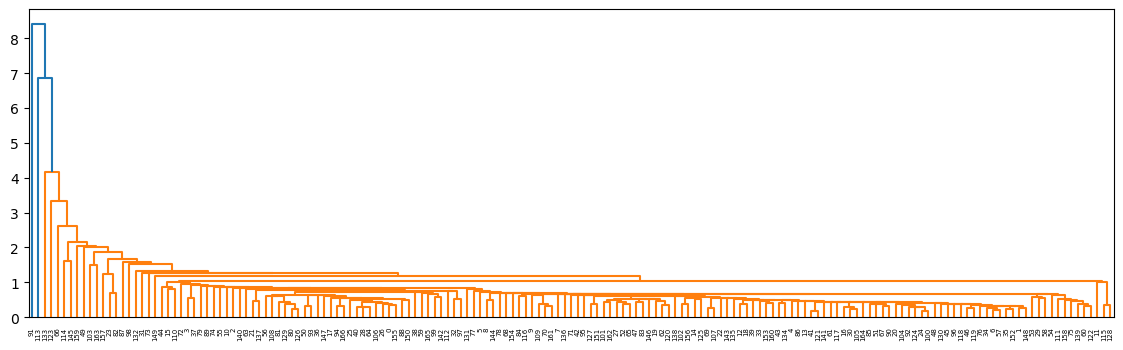

In [26]:
# Single linkage

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(14,4))
mergings = linkage(df_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage

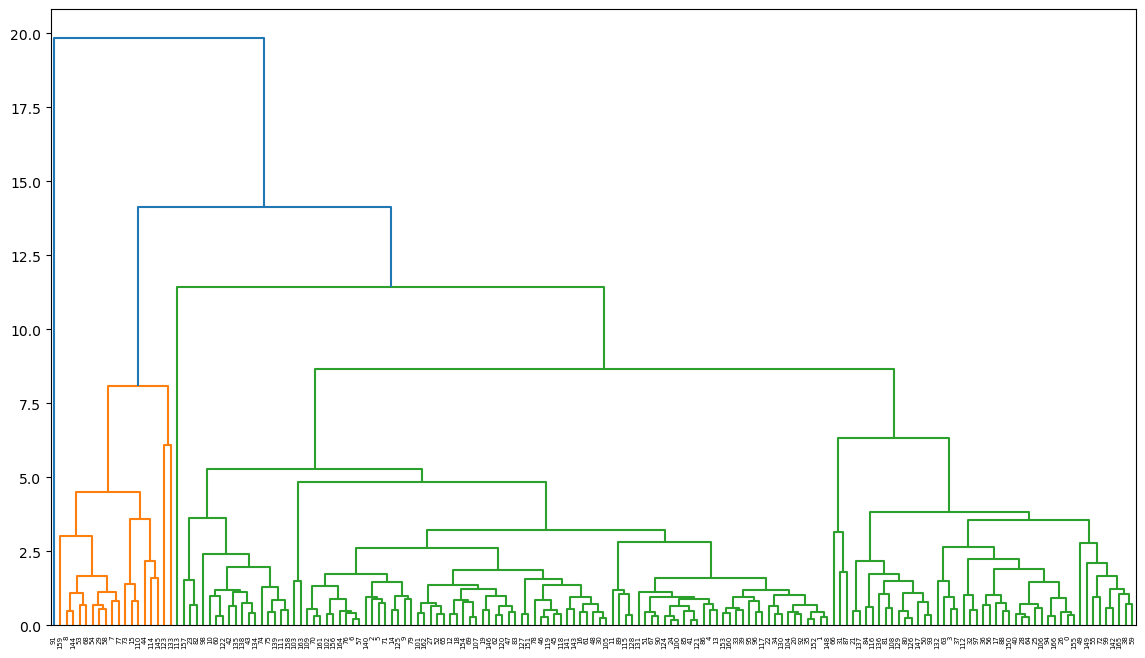

In [27]:
# Complete Linkage

plt.figure(figsize=(14,8))
mergings = linkage(df_scaled, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [28]:
dff = pd.DataFrame(df_scaled, columns=df_drop.columns)

In [29]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean',linkage='complete')

In [30]:
hc

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=5)

In [31]:
labels_hc = hc.fit_predict(dff)

In [32]:
labels_hc

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 2, 4, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int64)

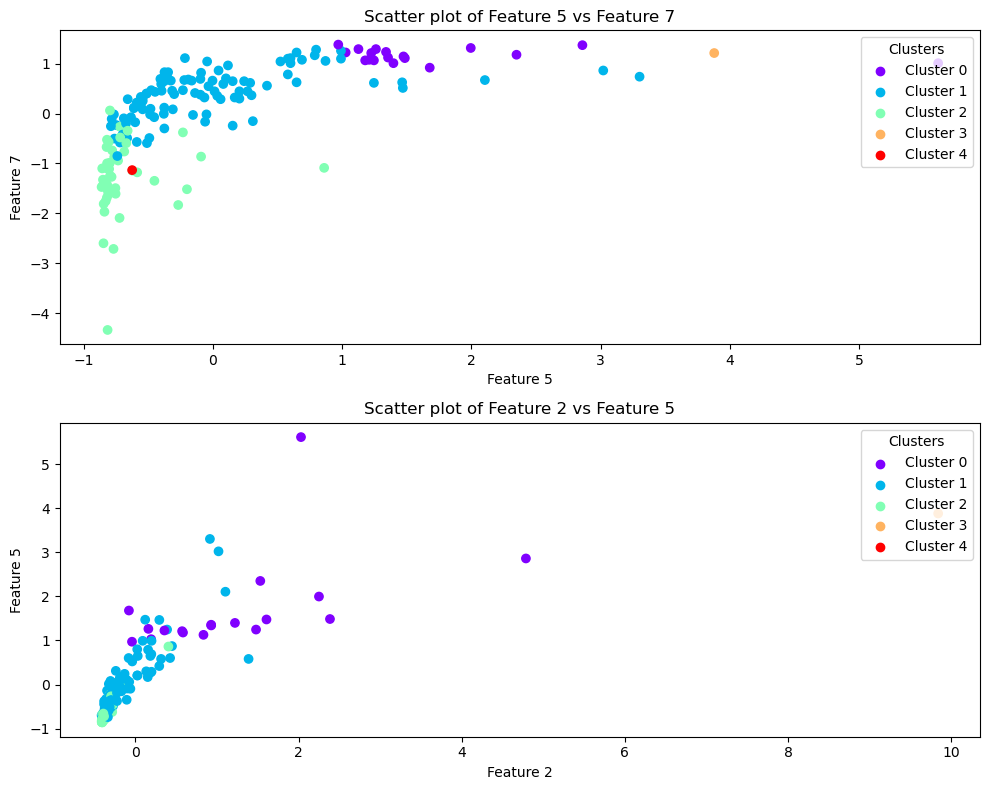

In [47]:
plt.figure(figsize=(10, 8))

# Plot the first scatter plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.scatter(dff.iloc[:, 4], dff.iloc[:, 6], c=labels_hc, cmap='rainbow')
plt.title('Scatter plot of Feature 5 vs Feature 7')
plt.xlabel('Feature 5')
plt.ylabel('Feature 7')

unique_labels = list(set(labels_hc))
for label in unique_labels:
    plt.scatter([], [], color=plt.cm.rainbow(label / max(unique_labels)), label=f'Cluster {label}')

# Adding the legend to the plot
plt.legend(title="Clusters", loc='upper right')

# Plot the second scatter plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.scatter(dff.iloc[:, 1], dff.iloc[:, 4], c=labels_hc, cmap='rainbow')
plt.title('Scatter plot of Feature 2 vs Feature 5')
plt.xlabel('Feature 2')
plt.ylabel('Feature 5')

# Create the legend manually
unique_labels = list(set(labels_hc))
for label in unique_labels:
    plt.scatter([], [], color=plt.cm.rainbow(label / max(unique_labels)), label=f'Cluster {label}')

# Adding the legend to the plot
plt.legend(title="Clusters", loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [49]:
cluster_0 =df[labels_hc==0]
cluster_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000


In [50]:
cluster_4 =df[labels_hc==4]
cluster_4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330


In [53]:
df_append = pd.concat([cluster_0, cluster_4])
df_append.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000


In [54]:
df_append.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,11.000000,27550.941579,4877.160053,23198.832632,47665.789474,6.988000,79.831579,1.994211,49722.631579
std,28.859564,21472.843947,2254.362393,17877.803199,22741.604389,23.623848,4.817105,0.973284,16863.186677
min,2.600000,589.490000,118.131000,405.420000,5150.000000,-3.220000,60.500000,1.150000,2330.000000
25%,3.200000,12337.100000,4178.975000,13051.300000,40100.000000,0.554500,80.000000,1.575000,44450.000000
50%,4.200000,24059.700000,4831.400000,18142.700000,42900.000000,1.050000,80.700000,1.870000,47400.000000
75%,4.650000,35536.300000,5670.950000,28639.400000,47550.000000,3.045000,81.750000,2.005000,52000.000000
max,130.000000,93200.000000,8663.600000,81084.000000,125000.000000,104.000000,82.800000,5.840000,87800.000000


We have removed few countries during outlier treatment but we might have dropped some countries which might be in need of help. Let's iterate our final list based on the information from the clusters which were in need of aid.ie, Cluster 0 and Cluster 4

### Number of Clusters in Hierarchical Clustering is 5